In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("hr_employee_churn_data.csv")

In [4]:
dataset.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
empid                    14999 non-null int64
satisfaction_level       14997 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [115]:
dataset.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## EDA

### Visualizing Categorical features - using countplot & catplot

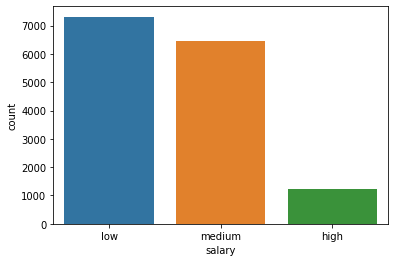

In [116]:
sns.countplot(x='salary', data=dataset)
##low salaried employee count is very high

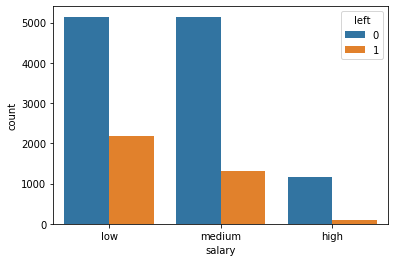

In [119]:
sns.countplot(x='salary', hue='left', data=dataset)
##Low salaried employees have a high churning rate

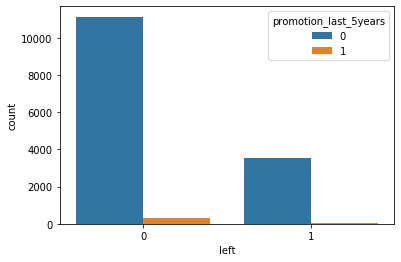

In [121]:
sns.countplot(x='left', hue='promotion_last_5years', data=dataset)
##The not promoted employee count is very high

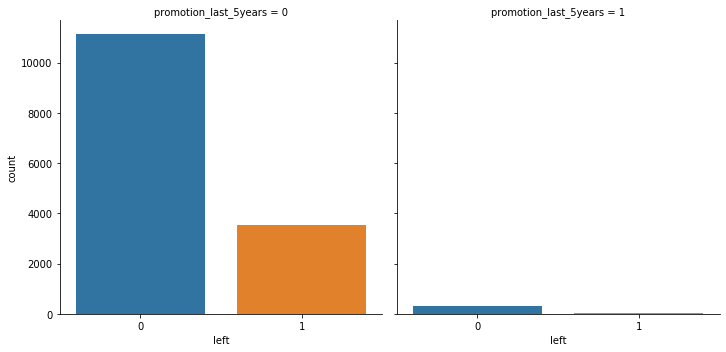

In [125]:
sns.catplot(x='left', col='promotion_last_5years',kind='count', data=dataset)
##Churning Rate of employee not promoted is very high

### Vizualising Continuous variables using distplot and boxplot

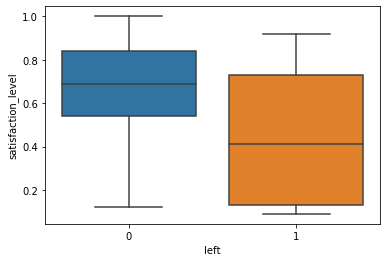

In [129]:
sns.boxplot(x='left', y='satisfaction_level', data=dataset)
##Employee left most have lower satisfaction_level ranging from 0.2 to 0.5

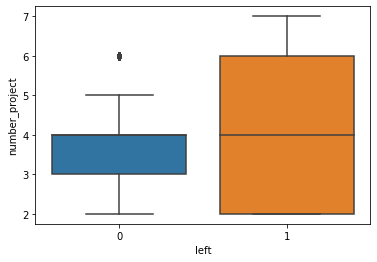

In [131]:
sns.boxplot(x='left', y='number_project', data=dataset)
##Employee left when project count is very high

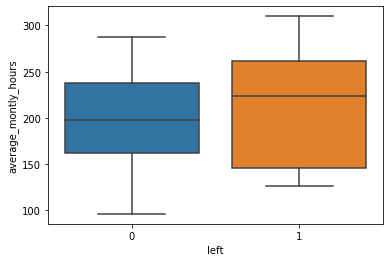

In [134]:
sns.boxplot(x='left', y='average_montly_hours', data=dataset)


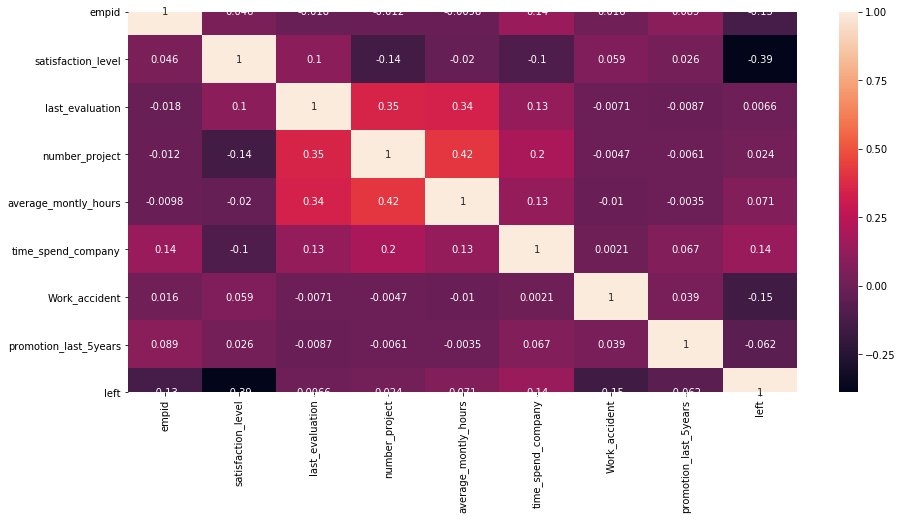

In [137]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(dataset.corr(), annot=True)

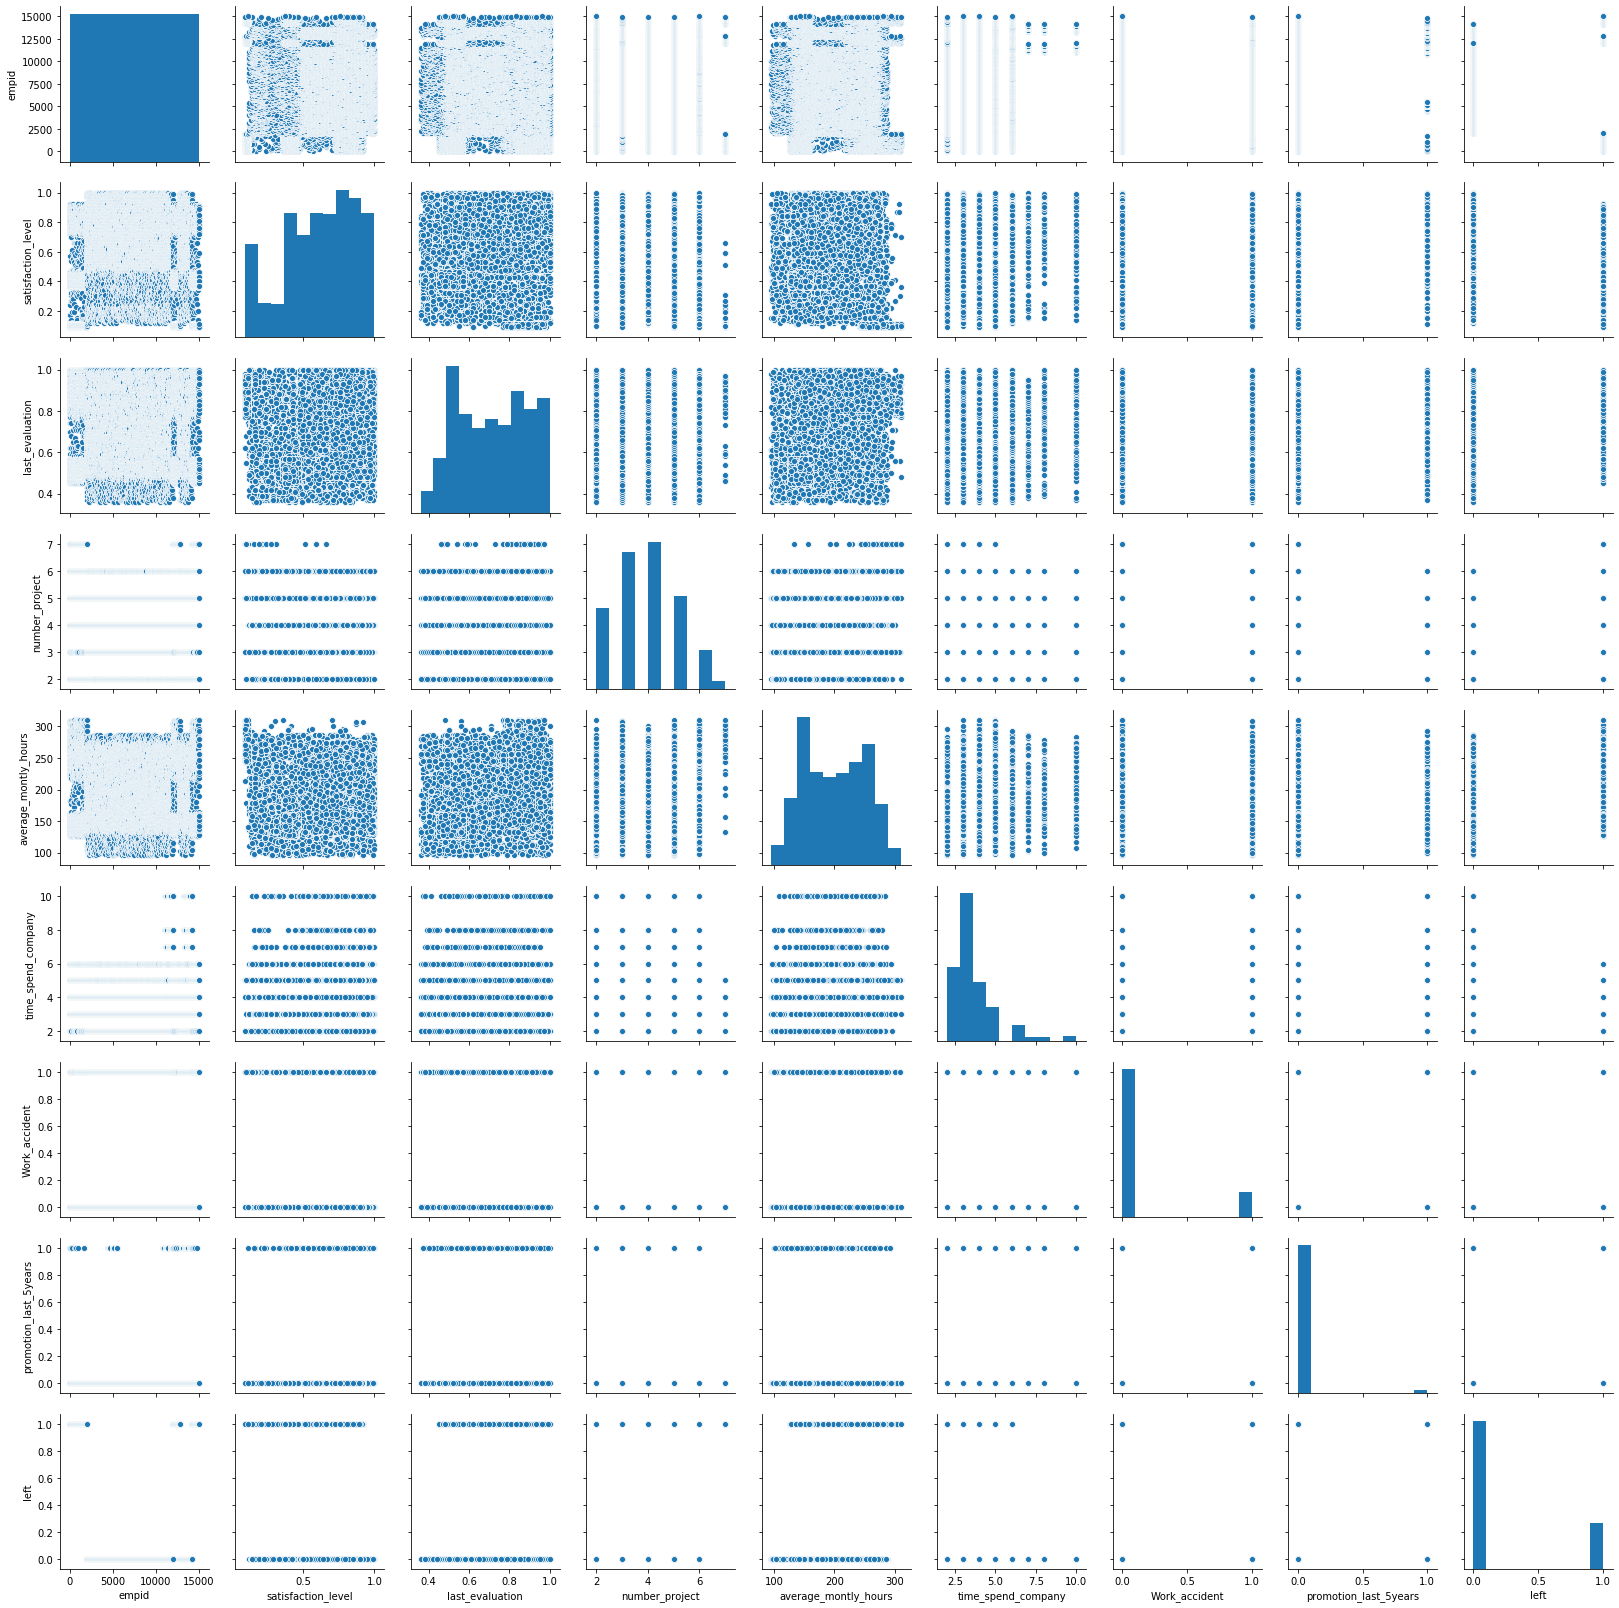

In [138]:
sns.pairplot(dataset)

### Feature Engineering 

In [6]:
dataset.isnull().sum()

empid                    0
satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [7]:
dataset.fillna(dataset.mean(), inplace=True)

In [8]:
dataset.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [9]:
#Encoding salary feature
salary_dummies = pd.get_dummies(dataset['salary'], drop_first=True)  ##drop_first remove 1 column to avoid dummy variable trap

In [10]:
#Concatenate encoded feature to main dataset and remove old salary feature
dataset = pd.concat([dataset,salary_dummies], axis=1)
dataset.drop(['salary','empid'], axis=1, inplace=True)

In [11]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


In [12]:
dataset.shape

(14999, 10)

In [13]:
X = dataset.drop(labels='left', axis=1)
Y = dataset['left']

In [14]:
X.shape

(14999, 9)

In [15]:
Y.shape

(14999,)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20, random_state=0)

In [18]:
X_train.shape

(11999, 9)

In [20]:
Y_train.shape

(11999,)

## Model Selection

In [22]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
#Create model parameter dictionary variable
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [39]:
#Using Grid Search on above models o find best model and best parameters
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,Y)        #Ran on entire dataset to find the best model & parameters
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [40]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9248616574438296,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9903993599573305,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}}]

As per above results, XGBoost gives best score, hence using same model & parameters for Model building

## Model Building

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)
model_xgb.fit(X_train,Y_train)

C:\Users\rraj1\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:30:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [24]:
pred_xgb = model_xgb.predict(X_test)

In [25]:
accuracy_score(pred_xgb,Y_test)

0.9923333333333333

In [26]:
roc_auc_score(pred_xgb,Y_test)

0.991475992025726

In [27]:
confusion_matrix(pred_xgb,Y_test)

array([[2292,   16],
       [   7,  685]], dtype=int64)